shape of edges: (375, 500)


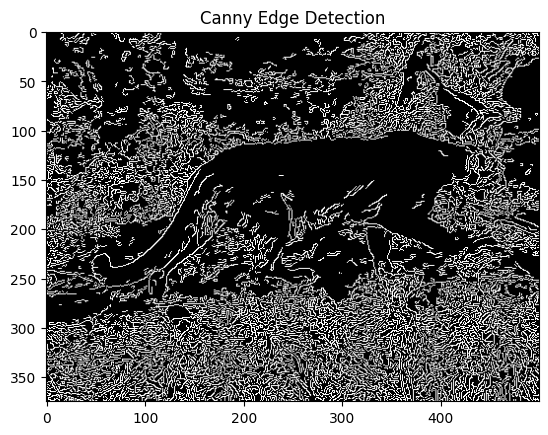

In [4]:
import cv2
import matplotlib.pyplot as plt

# 读取图像
image = cv2.imread('./dataset/secret.jpg', cv2.IMREAD_GRAYSCALE)

# 使用 Canny 算子进行边缘检测
edges = cv2.Canny(image, 100, 200)
print("shape of edges:", edges.shape)
# 显示边缘图像
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


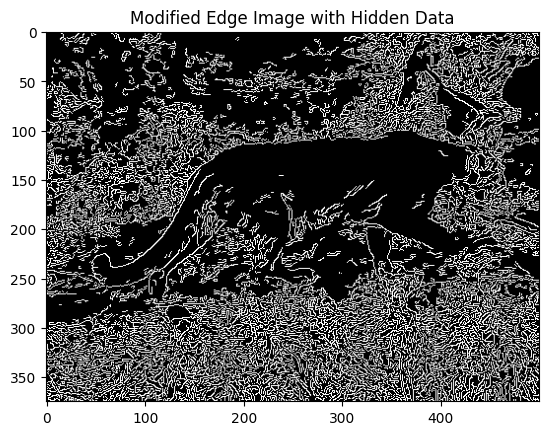

In [5]:
def embed_data_in_edges(edges, data):
    data = ''.join(format(ord(i), '08b') for i in data)  # 转换数据为二进制字符串
    data_index = 0

    # 获取边缘图像的尺寸
    rows, cols = edges.shape

    # 遍历边缘图像，修改每个边缘像素的最低有效位
    for i in range(rows):
        for j in range(cols):
            if edges[i, j] > 0:  # 如果是边缘像素
                if data_index < len(data):
                    # 将数据的当前位嵌入最低有效位
                    edges[i, j] = (edges[i, j] & 0xFE) | int(data[data_index])  # 修改最低有效位
                    data_index += 1
                else:
                    break

    return edges

# 需要隐藏的消息
message = "Hello, Steganography!"

# 在边缘图像中嵌入数据
modified_edges = embed_data_in_edges(edges, message)

# 显示修改后的边缘图像
plt.imshow(modified_edges, cmap='gray')
plt.title('Modified Edge Image with Hidden Data')
plt.show()


In [6]:
def extract_data_from_edges(edges):
    extracted_data = ""
    data_bit = ""
    
    rows, cols = edges.shape
    for i in range(rows):
        for j in range(cols):
            if edges[i, j] > 0:  # 如果是边缘像素
                # 提取最低有效位
                data_bit += str(edges[i, j] & 0x01)
                
                # 每8位组成一个字符
                if len(data_bit) >= 8:
                    byte = data_bit[:8]
                    extracted_data += chr(int(byte, 2))
                    data_bit = data_bit[8:]

    return extracted_data

# 提取隐藏的消息
extracted_message = extract_data_from_edges(modified_edges)
print("Extracted Message:", extracted_message)


Extracted Message: Hello, Steganography!ÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿÿ